# Problem Set 1

### Import Statements & Preparation

In [1]:
# Import Statements
import numpy as np
import qiskit as qs
from qiskit_aer import Aer, AerSimulator
from qiskit.quantum_info import Operator
from qiskit.visualization import plot_bloch_multivector, plot_histogram

# Skip unnecessary Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Backend Simulations
sv_backend = Aer.get_backend('statevector_simulator')
sim_backend = Aer.get_backend('aer_simulator')

## Question 1
---
The $\ket{++}$ state is a superposition of two qubits: $\frac{1}{\sqrt{2}}(\ket{0}+\ket{1})\otimes\frac{1}{\sqrt{2}}(\ket{0}+\ket{1}) = \frac{1}{2}(\ket{00}+\ket{01}+\ket{10}+\ket{11})$.

- What is the statevector that describes this state, and what are the measurement probabilities for every state?

<span style="color:darkblue;">The statevector describing this state is $\begin{bmatrix}1/2&1/2\cr1/2&1/2\end{bmatrix}$. The probability for each state is calculated as $P(X) = |\alpha|^2 $ resulting in $1/4$ or 25%.
</span>
    
- What circuit do you need to create such a state?

<span style="color:darkblue;">Applying a Hadermad gate on each of the qubits ($\ket{+}= H\ket{0}$) gives us the state $\ket{++}$</span>

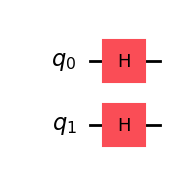

In [2]:
# Set up circuit with two qubits
qc = qs.QuantumCircuit(2)

# Add Hadermad gates to accomplish |++> state
qc.h(0)
qc.h(1)

# Show gates
qc.draw(output='mpl')

In [3]:
# Statevectors and Probabilities
state = sv_backend.run(qc).result().get_statevector()
print(state)

Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


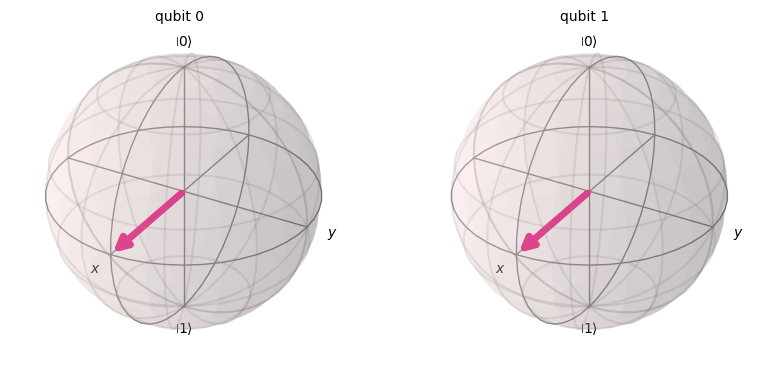

In [4]:
plot_bloch_multivector(state)

{'01': 252, '11': 246, '10': 253, '00': 249}


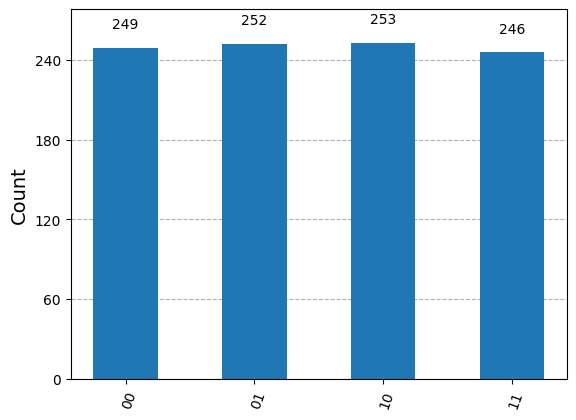

In [5]:
qc.measure_all()
counts = sim_backend.run(qc,shots=1000).result().get_counts()
print(counts)
plot_histogram(counts)

## Question 2
---

What circuits create the bell states $\ket{00} + \ket{11}$ and $\ket{01} + \ket{10}$?

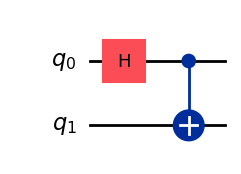

In [10]:
# Creating the bell state |00> + |11>
qc_2 = qs.QuantumCircuit(2)
qc_2.h(0)
qc_2.cx(0,1)
qc_2.draw(output='mpl')

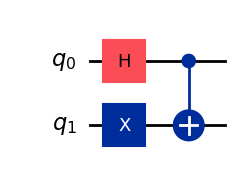

In [9]:
# Creating the bell state |01> + |10>
qc_3 = qs.QuantumCircuit(2)
qc_3.x(1)
qc_3.h(0)
qc_3.cx(0,1)
qc_3.draw(output='mpl')

## Question 3
---
#### What is the Matrix that describes the following operator: $XHT$?

<span style="color:darkblue">
The matrix consists of the following operators:
$
\begin{aligned}
X = \begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}, \quad
H = \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}, \quad
T = \begin{pmatrix}
1 & 0 \\
0 & e^{i\pi/4}
\end{pmatrix}
\end{aligned}$

Calculating $X*H*T$ we get:
$XHT = \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & -e^{i\pi/4} \\
1 & e^{i\pi/4}
\end{pmatrix}$

</span>

#### What is the statevector when applying this operator ($XHT$) to the $\ket{1}$ state?

<span style="color:darkblue">
    
$XHT \ket{1} = \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & -e^{i\pi/4} \\
1 & e^{i\pi/4}
\end{pmatrix}
\begin{pmatrix} 0 \\ 1 \end{pmatrix}
= \frac{1}{\sqrt{2}} \begin{pmatrix}
-e^{i\pi/4} \\
e^{i\pi/4}
\end{pmatrix}
= \frac{1}{\sqrt{2}} \left( -e^{i\pi/4} \ket{0} + e^{i\pi/4} \ket{1} \right)$

</span>

#### What is the probability of measuring $\ket{0}$ and $\ket{1}$ after applying this operator to the $\ket{1}$ state?

<span style="color:darkblue">
Calculating the probability with $P(X) = |\alpha|^2 $ and applying it to the solution of $XHT \ket{1}$ results in $1/2$ (or 50%) for measuring either $\ket{0}$ or $\ket{1}$.
</span>


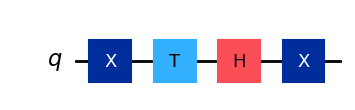

In [14]:
# Visualize the state XHT|1> on Bloch sphere
qc_4 = qs.QuantumCircuit(1)
qc_4.x(0)
qc_4.t(0)
qc_4.h(0)
qc_4.x(0)
qc_4.draw(output='mpl')

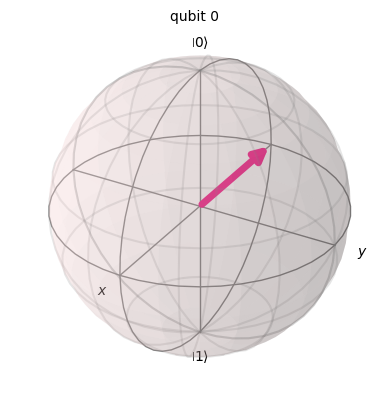

In [13]:
state_4 = sv_backend.run(qc_4).result().get_statevector()
plot_bloch_multivector(state_4)